<a href="https://colab.research.google.com/github/sa21262/datascience22/blob/main/Assignment21a/South_Asian_Wireless_Telecom_Operator_(SATO_2015)new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

import itertools
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, StratifiedKFold

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import silhouette_score, f1_score , classification_report
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.utils.extmath import randomized_range_finder
from sklearn import metrics
from sklearn import datasets
import sklearn
from collections import Counter
from imblearn.datasets import make_imbalance
import pylab as pl

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/sa21262/datascience22/main/Assignment21a/South%20Asian%20Wireless%20Telecom%20Operator%20(SATO%202015).csv") # Dataset is loaded here 
df


,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
0,1914,1592.7200,23.26,2.5,1.161130e+01,375,25523,99000,1,2G,2G,telenor,mobilink,Churned
1,2073,1404.1496,174.45,27.5,2.531725e+03,389,14584,77299,1,2G,2G,mobilink,ufone,Churned
2,3139,85.5504,14.34,5.0,2.913306e+04,15,477,4194,1,Other,Other,ptcl,telenor,Churned
3,139,2315.2292,19.25,52.5,2.674413e+05,636,50316,52400,2,2G,2G,telenor,ufone,Active
4,139,227.8620,2.95,42.5,1.461621e+06,17,2568,1701,1,NaN,NaN,mobilink,ufone,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3085,884.9700,0.01,0.0,2.103931e+06,439,0,358,1,3G,3G,ptcl,ufone,Active
1996,1779,1219.9000,21.98,180.0,4.179692e+06,19,1908,4456,2,3G,3G,ptcl,ptcl,Churned
1997,2774,652.6300,4.14,57.5,2.166006e+06,526,741,716,1,3G,3G,warid,ufone,Active
1998,2796,1179.3900,2.35,72.5,1.974496e+07,191,8928,36879,2,3G,3G,zong,ufone,Active


In [ ]:
df.info()                                                                       # information about the data 
          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   network_age                2000 non-null   int64  
 1   Aggregate_Total_Rev        2000 non-null   float64
 2   Aggregate_SMS_Rev          2000 non-null   float64
 3   Aggregate_Data_Rev         2000 non-null   float64
 4   Aggregate_Data_Vol         2000 non-null   float64
 5   Aggregate_Calls            2000 non-null   int64  
 6   Aggregate_ONNET_REV        2000 non-null   int64  
 7   Aggregate_OFFNET_REV       2000 non-null   int64  
 8   Aggregate_complaint_count  2000 non-null   int64  
 9   aug_user_type              1755 non-null   object 
 10  sep_user_type              1794 non-null   object 
 11  aug_fav_a                  1999 non-null   object 
 12  sep_fav_a                  1999 non-null   object 
 13  Class                      2000 non-null   objec

In [ ]:
print("Number of rows before dropping NaNs: %d" % len(df)) #dropping NaN values 
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 2000
Number of rows after dropping NaNs: 1721


In [ ]:
                                                                                # LabelEncoder is applied here, so levels are numbered now 
label_enc = LabelEncoder()
df['Class'] = label_enc.fit_transform(df['Class'])                              # label Class is transformed into numbers 

df['Class'].value_counts()                                                      #balanced dataset 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    868
0    853
Name: Class, dtype: int64

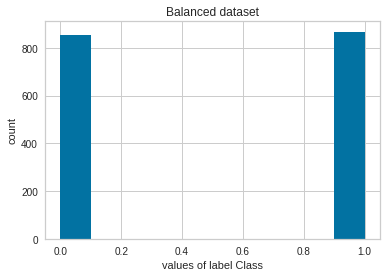

In [ ]:
histogram1=df['Class'].hist()                                                   #balanced target variable 

fig = histogram1.get_figure()

pl.title("Balanced dataset")
pl.xlabel("values of label Class")
pl.ylabel("count")
fig.savefig('balanced1.pdf')

In [ ]:
df = pd.get_dummies(df)                                                         #onehot encoding is performed 
df

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,Class,...,aug_fav_a_telenor,aug_fav_a_ufone,aug_fav_a_warid,aug_fav_a_zong,sep_fav_a_mobilink,sep_fav_a_ptcl,sep_fav_a_telenor,sep_fav_a_ufone,sep_fav_a_warid,sep_fav_a_zong
0,1914,1592.7200,23.26,2.5,1.161130e+01,375,25523,99000,1,1,...,1,0,0,0,1,0,0,0,0,0
1,2073,1404.1496,174.45,27.5,2.531725e+03,389,14584,77299,1,1,...,0,0,0,0,0,0,0,1,0,0
2,3139,85.5504,14.34,5.0,2.913306e+04,15,477,4194,1,1,...,0,0,0,0,0,0,1,0,0,0
3,139,2315.2292,19.25,52.5,2.674413e+05,636,50316,52400,2,0,...,1,0,0,0,0,0,0,1,0,0
5,143,973.9664,21.86,22.5,9.208711e+05,421,4032,15476,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3085,884.9700,0.01,0.0,2.103931e+06,439,0,358,1,0,...,0,0,0,0,0,0,0,1,0,0
1996,1779,1219.9000,21.98,180.0,4.179692e+06,19,1908,4456,2,1,...,0,0,0,0,0,1,0,0,0,0
1997,2774,652.6300,4.14,57.5,2.166006e+06,526,741,716,1,0,...,0,0,1,0,0,0,0,1,0,0
1998,2796,1179.3900,2.35,72.5,1.974496e+07,191,8928,36879,2,0,...,0,0,0,1,0,0,0,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f237aee4890>,
      dtype=object)

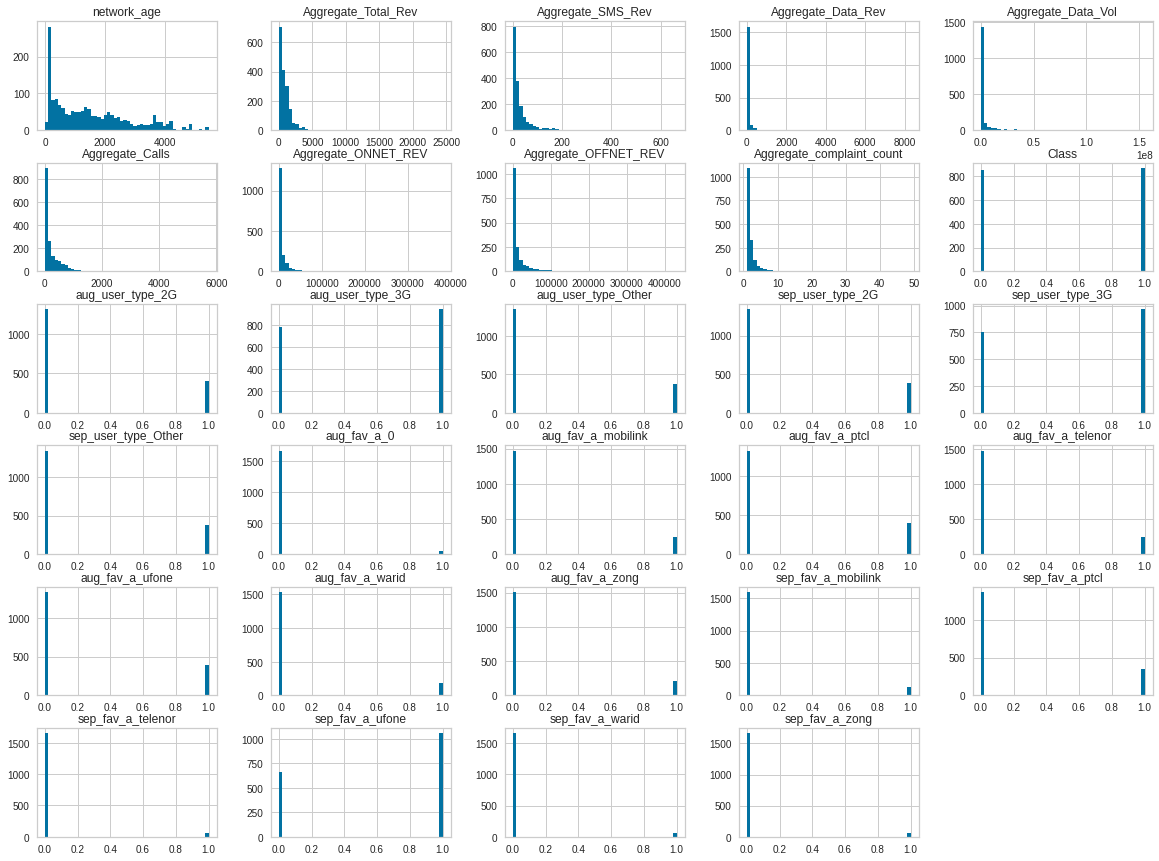

In [ ]:
df.hist(bins=50, figsize=(20,15))                                               # plotting histogram of all the features 

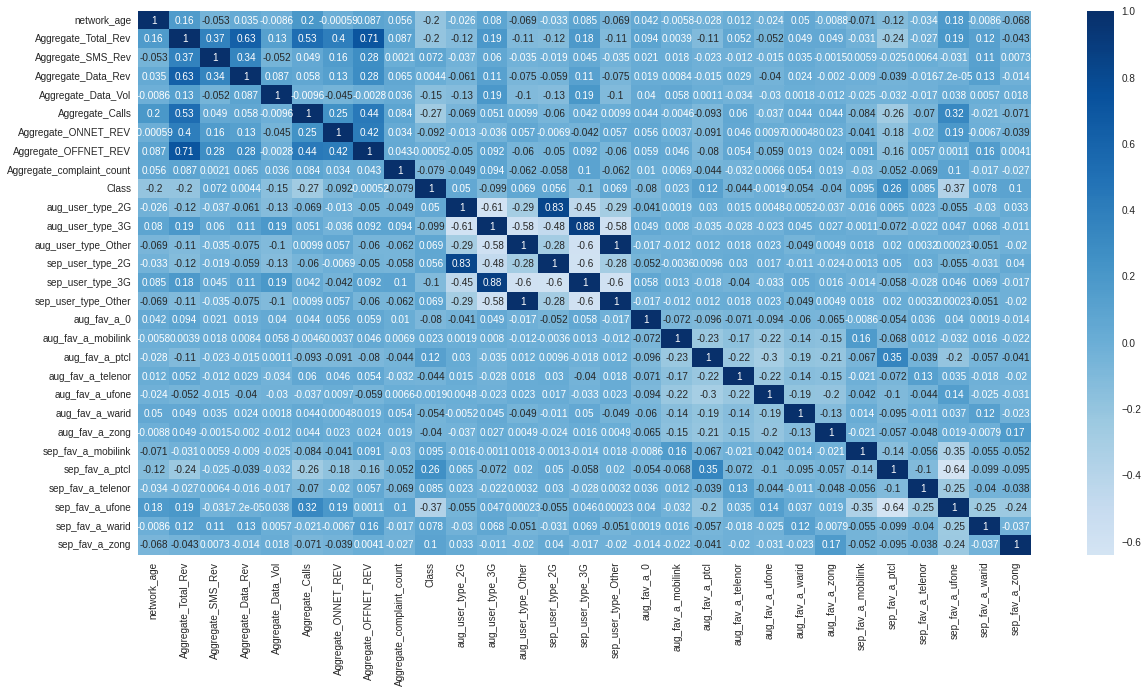

In [ ]:
correlations = df.corr()                                                        #heatmap to show correlaton between features and label variable 
a1, b1 = plt.subplots(figsize=(20, 10))
b1 = sns.heatmap(correlations, annot=True, center=0,  cmap="Blues")

In [ ]:
y=df['Class'].copy()
x=df.drop(['Class'],axis=1)
print(f'Distribution before imbalancing: {Counter(y)}')

print (' 65% Imbalance ' )                                                      # number of 1's are 65% of the total lenght of column class 
X_res, y_res = make_imbalance(x, y,
                              sampling_strategy={0: 468, 1: 868},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res)}')

Distribution before imbalancing: Counter({1: 868, 0: 853})
 65% Imbalance 
Distribution after imbalancing: Counter({1: 868, 0: 468})


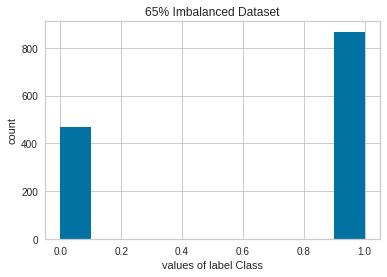

In [ ]:
histogram2=y_res.hist()                                                         # 65% are 1's
fig = histogram2.get_figure()

pl.title("65% Imbalanced Dataset")
pl.xlabel("values of label Class")
pl.ylabel("count")
fig.savefig('Imbalanced1 65 perc.pdf')

In [ ]:
print (' 75% Imbalance ' )                                                      # number of 1's are 75% of the total lenght of column class 
X_res1, y_res1 = make_imbalance(x, y,
                              sampling_strategy={0: 290, 1: 868},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res1)}')

 75% Imbalance 
Distribution after imbalancing: Counter({1: 868, 0: 290})


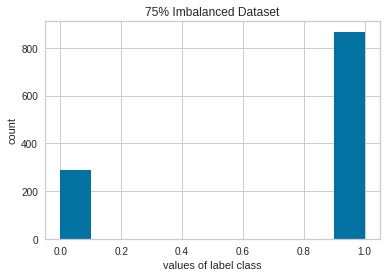

In [ ]:
histogram3=y_res1.hist() # 75% are 1's

fig = histogram3.get_figure()

pl.title("75% Imbalanced Dataset")
pl.xlabel("values of label class")
pl.ylabel("count")

fig.savefig('Imbalanced1 75 perc.pdf')

In [ ]:
print (' 90% Imbalance ' )                                                      # number of 1's are 90% of the total lenght of column class 
X_res2, y_res2 = make_imbalance(x, y,
                              sampling_strategy={0: 97, 1: 868},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res2)}')

 90% Imbalance 
Distribution after imbalancing: Counter({1: 868, 0: 97})


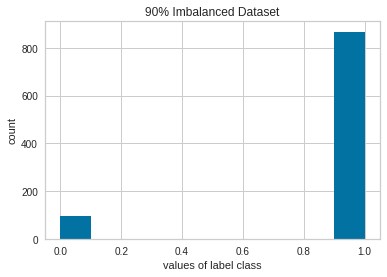

In [ ]:
histogram4=y_res2.hist() # 90% are 1's

fig = histogram4.get_figure()

pl.title("90% Imbalanced Dataset")
pl.xlabel("values of label class")
pl.ylabel("count")

fig.savefig('Imbalanced1 90 perc.pdf')

# Baseline Approach 

In [ ]:
def method1(d1 ,d2, label_variable):
  

  method1_clf=RandomForestClassifier()                                          # baseline classifier 
  metric=[]                                                                     # array to store measured metric 
  skf=StratifiedKFold(n_splits=10,random_state=None)                            # stratified cross validation is applied 
  skf.get_n_splits(d1,d2)

  for train_index,test_index in skf.split(d1,d2):

    
    x_train,x_test=d1.iloc[train_index],d1.iloc[test_index]                     # 4 surrogates of data are created training and test data 
    y_train,y_test=d2.iloc[train_index],d2.iloc[test_index]
    

    method1_clf.fit(x_train,y_train)                                            # model is fitted with training data 
    prediction=method1_clf.predict(x_test)                                      # model is tested on test data 
    score=f1_score(prediction,y_test)
    metric.append(score)                                                        # scores obtained for 10 iterations are stored in a array 
  
  metric=np.array([metric]) 
  print( "F1 Score for 10 iterations is given by :")                            # metric is converted to numpy array 
  print( metric)                                                                # All 10 scores for 1 iterations are displayed here 
  print("\n")

  print( "Mean F1 Score :")                                                     
  print(np.mean(metric))                                                        # mean of 10 scores is diplayed here
  print("\n")
  
  print( "standard Deviation of F1 Score :")
  print(np.std(metric))                                                         # standard deviation of 10 scores is diplayed here
  print("\n")
                                                         
  result=pd.DataFrame(classification_report(y_test, prediction, output_dict=True)) # classification report is displayed here 
  display(result)
  print(result.to_latex(index=True))



In [ ]:
method1(x,y,'Class')                                                            # Method1 for original dataset 

F1 Score for 10 iterations is given by :
[[0.75903614 0.73684211 0.6918239  0.7388535  0.69346734 0.76237624
  0.76439791 0.62962963 0.62025316 0.62745098]]


Mean F1 Score :
0.7024130907042345


standard Deviation of F1 Score :
0.055692269088460186




,0,1,accuracy,macro avg,weighted avg
precision,0.638095,0.716418,0.668605,0.677257,0.677257
recall,0.779070,0.558140,0.668605,0.668605,0.668605
f1-score,0.701571,0.627451,0.668605,0.664511,0.664511
support,86.000000,86.000000,0.668605,172.000000,172.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0 &          1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &   0.638095 &   0.716418 &  0.668605 &    0.677257 &      0.677257 \\
recall    &   0.779070 &   0.558140 &  0.668605 &    0.668605 &      0.668605 \\
f1-score  &   0.701571 &   0.627451 &  0.668605 &    0.664511 &      0.664511 \\
support   &  86.000000 &  86.000000 &  0.668605 &  172.000000 &    172.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X_res, y_res,'Class')                                                   # Method1 for 65% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.8172043  0.86631016 0.80225989 0.82105263 0.82485876 0.81767956
  0.81818182 0.82222222 0.82162162 0.80662983]]


Mean F1 Score :
0.8218020791440676


standard Deviation of F1 Score :
0.016292386743208744




,0,1,accuracy,macro avg,weighted avg
precision,0.641026,0.776596,0.736842,0.708811,0.729707
recall,0.543478,0.839080,0.736842,0.691279,0.736842
f1-score,0.588235,0.806630,0.736842,0.697433,0.731095
support,46.000000,87.000000,0.736842,133.000000,133.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0 &          1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &   0.641026 &   0.776596 &  0.736842 &    0.708811 &      0.729707 \\
recall    &   0.543478 &   0.839080 &  0.736842 &    0.691279 &      0.736842 \\
f1-score  &   0.588235 &   0.806630 &  0.736842 &    0.697433 &      0.731095 \\
support   &  46.000000 &  87.000000 &  0.736842 &  133.000000 &    133.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X_res1, y_res1,'Class')                                                 # Method1 for 75% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.86631016 0.89361702 0.83870968 0.86956522 0.84210526 0.87368421
  0.83695652 0.86666667 0.88043478 0.8839779 ]]


Mean F1 Score :
0.8652027421766251


standard Deviation of F1 Score :
0.018760207398246326




,0,1,accuracy,macro avg,weighted avg
precision,0.700000,0.842105,0.817391,0.771053,0.806270
recall,0.482759,0.930233,0.817391,0.706496,0.817391
f1-score,0.571429,0.883978,0.817391,0.727703,0.805161
support,29.000000,86.000000,0.817391,115.000000,115.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0 &          1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &   0.700000 &   0.842105 &  0.817391 &    0.771053 &      0.806270 \\
recall    &   0.482759 &   0.930233 &  0.817391 &    0.706496 &      0.817391 \\
f1-score  &   0.571429 &   0.883978 &  0.817391 &    0.727703 &      0.805161 \\
support   &  29.000000 &  86.000000 &  0.817391 &  115.000000 &    115.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X_res2, y_res2,'Class')                                                 # Method1 for 90% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.95081967 0.94505495 0.95081967 0.94565217 0.94565217 0.95027624
  0.93922652 0.94505495 0.95081967 0.96132597]]


Mean F1 Score :
0.9484701983611188


standard Deviation of F1 Score :
0.0055655071448813655




,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.925532,0.927083,0.962766,0.932513
recall,0.222222,1.000000,0.927083,0.611111,0.927083
f1-score,0.363636,0.961326,0.927083,0.662481,0.905293
support,9.000000,87.000000,0.927083,96.000000,96.000000


\begin{tabular}{lrrrrr}
\toprule
{} &         0 &          1 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  1.000000 &   0.925532 &  0.927083 &   0.962766 &      0.932513 \\
recall    &  0.222222 &   1.000000 &  0.927083 &   0.611111 &      0.927083 \\
f1-score  &  0.363636 &   0.961326 &  0.927083 &   0.662481 &      0.905293 \\
support   &  9.000000 &  87.000000 &  0.927083 &  96.000000 &     96.000000 \\
\bottomrule
\end{tabular}



In [ ]:
def elbowgraph(x):                                                              # implementation of Elbow And Sillhouette Method 
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(2,12), scoring='silhouette', timings=True)

  visualizer.fit(x)        # Fit the data to the visualizer
  visualizer.show()
  viz = SilhouetteVisualizer(model, colors='yellowbrick')
  viz.fit(x)        # Fit the data to the visualizer
  viz.show()        # Finalize and render the figure

  return visualizer.elbow_value_


# Clustering Method

In [ ]:
def Elbowandsilhoutte(d1 ,d2, label_variable):                                  # Method 2 
  skf=StratifiedKFold(n_splits=10,random_state=None)                            # stratified cross validation is applied 
  skf.get_n_splits(d1,d2)

  for train_index,test_index in skf.split(d1,d2):

    
    x1_train,x1_test=d1.iloc[train_index],d1.iloc[test_index]                   # 4 surrogates of data are created training and test data 
    y1_train,y1_test=d2.iloc[train_index],d2.iloc[test_index]


    scaler = StandardScaler()                                                   # scaling and standardisation o of the data 
    x1_train = scaler.fit_transform(x1_train)                                   
   
    x1_test = scaler.transform(x1_test)
  
    
  k2=elbowgraph(x1_train)                                                       # Elbow and silhouette function is called 
  print("The optimum value of k is ",k2)
  
  




  kmeans = KMeans(n_clusters=k2)                                                # finally K means is applied with optimum value of k 
  kmeans.fit(x1_train)                                                          # assigning each row of training data with particular cluster number
  
  labels = kmeans.predict(x1_test)                                              # getting prediction of Kmeans on test data to assign each instant of test data with cluster label

  centroids  = kmeans.cluster_centers_                                          # evaluating centroids of clusters 
  cluster=kmeans.labels_

  new_x1_train=pd.DataFrame(x1_train)                                           # x1_train is converted to data frame 
  new_x1_train['Cluster_number'] = cluster                                      # adding cluster number column with training dataframe 
  new_x1_train['label_variable']=  y1_train                                     # adding label variable column in  training dataframe
  new_x1_train.dropna(axis=0,inplace=True)
  


  


  for i in range (len(centroids)) :
     print("Centroid of cluster " + str(i)+ " = " +str(centroids[i,:].mean()))  # displaying the centroid of each cluster 
      
     cls= new_x1_train['label_variable'].loc[(new_x1_train['Cluster_number'] == i) ]  # displaying instances of label variable in each cluster 
     print(cls.value_counts())
     print("\n\n")

  model1=RandomForestClassifier()                                       
  answer= np.zeros(len(y1_test))
  f1score=[]
  for c in range (len(centroids)):                                            
     cls1= new_x1_train.loc[(new_x1_train['Cluster_number'] == c) ]
     cls1.dropna(subset=['label_variable'],inplace=True)


     
     

     if cls1['label_variable'].nunique() > 1:                                   # Training random Forest with those clusters having instances of more than one class 
        a1=cls1['label_variable']
        a2=cls1.drop(['label_variable', 'Cluster_number'], axis=1)
        model1.fit(a2,a1)                                                       # model is fitted with training data 

        




        for k in range (len(labels)):                                           # getting prediction from random forest on x_test 
          if labels[k]==c:
            answer[k]=model1.predict(np.reshape(x1_test[k],(1,-1)))
     
     f1score.append(f1_score(y1_test,answer))
  for f in range(len(f1score)):
    print("F1 Score on cluster "+ str(f)+ " is given by :"+str(f1score[f]))   
  

  f1score=np.array([f1score])

  print("\n")

  print( "Mean F1 Score :")                                                     # mean of the scores is displayed here 
  print("\n")


  print( "standard Deviation of F1 Score :")
  print(np.std(f1score))                                                        # standard deviation of  scores is diplayed here
  print("\n")
                                                         
  result=pd.DataFrame(classification_report(y1_test, answer, output_dict=True))
  display(result)
  print(result.to_latex(index=True))


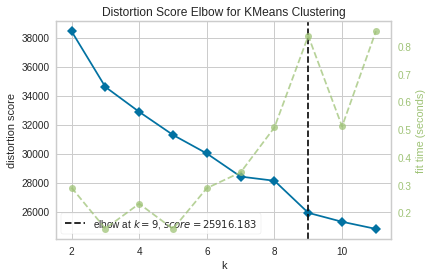

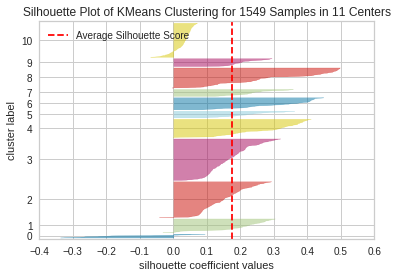

The optimum value of k is  9
Centroid of cluster 0 = 0.0060895102450191025
0.0    47
1.0    44
Name: label_variable, dtype: int64



Centroid of cluster 1 = -0.038511803623559604
1.0    130
0.0    105
Name: label_variable, dtype: int64



Centroid of cluster 2 = 0.011631822686246891
0.0    205
1.0    194
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.09503364106061825
1.0    69
0.0    65
Name: label_variable, dtype: int64



Centroid of cluster 4 = -0.033319012135577156
1.0    142
0.0    118
Name: label_variable, dtype: int64



Centroid of cluster 5 = 0.6519301145340078
1.0    17
0.0    16
Name: label_variable, dtype: int64



Centroid of cluster 6 = 0.06068946114352219
1.0    25
0.0    20
Name: label_variable, dtype: int64



Centroid of cluster 7 = 0.11766471594676849
0.0    22
1.0    21
Name: label_variable, dtype: int64



Centroid of cluster 8 = -0.007368880581345938
0.0    44
1.0    38
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.0
F1 Score on cluster 1 is given by :0.1941747572815534
F1 Score on cluster 2 is given by :0.2518518518518518
F1 Score on cluster 3 is given by :0.30000000000000004
F1 Score on cluster 4 is given by :0.3790849673202614
F1 Score on cluster 5 is given by :0.3790849673202614
F1 Score on cluster 6 is given by :0.3870967741935484
F1 Score on cluster 7 is given by :0.41772151898734183
F1 Score on cluster 8 is given by :0.4727272727272727


Mean F1 Score :
0.3090824566313434


standard Deviation of F1 Score :
0.13604026608319414




,0,1,accuracy,macro avg,weighted avg
precision,0.494624,0.493671,0.494186,0.494147,0.494147
recall,0.534884,0.453488,0.494186,0.494186,0.494186
f1-score,0.513966,0.472727,0.494186,0.493347,0.493347
support,86.000000,86.000000,0.494186,172.000000,172.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0 &          1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &   0.494624 &   0.493671 &  0.494186 &    0.494147 &      0.494147 \\
recall    &   0.534884 &   0.453488 &  0.494186 &    0.494186 &      0.494186 \\
f1-score  &   0.513966 &   0.472727 &  0.494186 &    0.493347 &      0.493347 \\
support   &  86.000000 &  86.000000 &  0.494186 &  172.000000 &    172.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(x,y,'Class')                                                  # Method 2 on Original dataset 


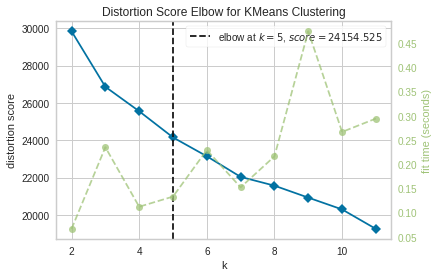

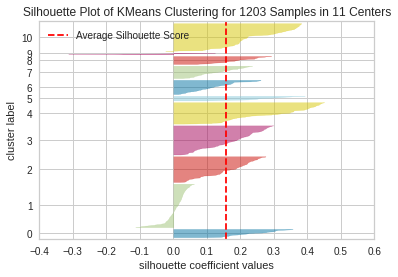

The optimum value of k is  5
Centroid of cluster 0 = -0.04600495506450509
1.0    191
0.0     90
Name: label_variable, dtype: int64



Centroid of cluster 1 = -0.010914384174854875
1.0    310
0.0    231
Name: label_variable, dtype: int64



Centroid of cluster 2 = -0.03743306682858448
1.0    174
0.0     67
Name: label_variable, dtype: int64



Centroid of cluster 3 = 0.49483014076099857
0.0    24
1.0    23
Name: label_variable, dtype: int64



Centroid of cluster 4 = 0.10668804619274853
1.0    37
0.0    10
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.3716814159292035
F1 Score on cluster 1 is given by :0.6357615894039735
F1 Score on cluster 2 is given by :0.7485380116959063
F1 Score on cluster 3 is given by :0.7570621468926554
F1 Score on cluster 4 is given by :0.7734806629834253


Mean F1 Score :
0.6573047653810328


standard Deviation of F1 Score :
0.15087523704451156




/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,0,1,accuracy,macro avg,weighted avg
precision,0.564103,0.744681,0.691729,0.654392,0.682225
recall,0.478261,0.804598,0.691729,0.641429,0.691729
f1-score,0.517647,0.773481,0.691729,0.645564,0.684997
support,46.000000,87.000000,0.691729,133.000000,133.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0 &          1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &   0.564103 &   0.744681 &  0.691729 &    0.654392 &      0.682225 \\
recall    &   0.478261 &   0.804598 &  0.691729 &    0.641429 &      0.691729 \\
f1-score  &   0.517647 &   0.773481 &  0.691729 &    0.645564 &      0.684997 \\
support   &  46.000000 &  87.000000 &  0.691729 &  133.000000 &    133.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X_res, y_res,'Class')                                         # Method 2 on 65% imbalanced version of dataset 


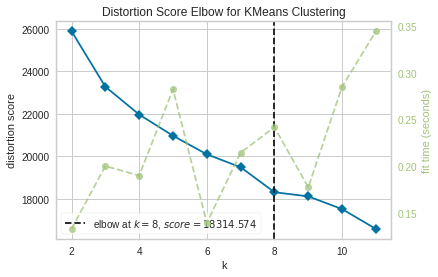

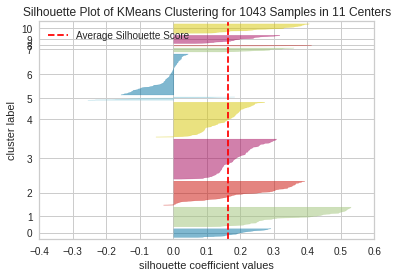

The optimum value of k is  8
Centroid of cluster 0 = 0.011235196594637722
1.0    71
0.0    14
Name: label_variable, dtype: int64



Centroid of cluster 1 = 0.029115843107170837
1.0    29
0.0    19
Name: label_variable, dtype: int64



Centroid of cluster 2 = 0.5651300253964597
1.0    21
0.0    12
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.038277717599000734
1.0    139
0.0     42
Name: label_variable, dtype: int64



Centroid of cluster 4 = -0.043893715787517086
1.0    155
0.0     45
Name: label_variable, dtype: int64



Centroid of cluster 5 = 0.1058809300876395
1.0    40
0.0     8
Name: label_variable, dtype: int64



Centroid of cluster 6 = -0.07534815774459089
1.0    126
0.0     16
Name: label_variable, dtype: int64



Centroid of cluster 7 = 0.004281883396344893
1.0    172
0.0    105
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.13043478260869565
F1 Score on cluster 1 is given by :0.18947368421052632
F1 Score on cluster 2 is given by :0.2626262626262626
F1 Score on cluster 3 is given by :0.47457627118644063
F1 Score on cluster 4 is given by :0.6470588235294118
F1 Score on cluster 5 is given by :0.6762589928057554
F1 Score on cluster 6 is given by :0.8025477707006369
F1 Score on cluster 7 is given by :0.8491620111731845


Mean F1 Score :
0.5040173248551143


standard Deviation of F1 Score :
0.26363122501376746




,0,1,accuracy,macro avg,weighted avg
precision,0.545455,0.817204,0.765217,0.681329,0.748676
recall,0.413793,0.883721,0.765217,0.648757,0.765217
f1-score,0.470588,0.849162,0.765217,0.659875,0.753696
support,29.000000,86.000000,0.765217,115.000000,115.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0 &          1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &   0.545455 &   0.817204 &  0.765217 &    0.681329 &      0.748676 \\
recall    &   0.413793 &   0.883721 &  0.765217 &    0.648757 &      0.765217 \\
f1-score  &   0.470588 &   0.849162 &  0.765217 &    0.659875 &      0.753696 \\
support   &  29.000000 &  86.000000 &  0.765217 &  115.000000 &    115.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X_res1, y_res1,'Class')                                       # Method 2 on 75% imbalanced version of dataset


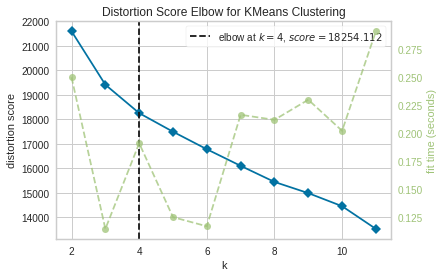

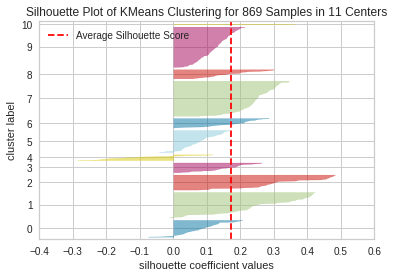

The optimum value of k is  4
Centroid of cluster 0 = -0.04422602337186167
1.0    187
0.0     13
Name: label_variable, dtype: int64



Centroid of cluster 1 = 0.5071475519274972
1.0    31
0.0     7
Name: label_variable, dtype: int64



Centroid of cluster 2 = -0.0031505446558285637
1.0    341
0.0     45
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.03794210191480981
1.0    213
0.0     23
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.3207547169811321
F1 Score on cluster 1 is given by :0.4521739130434783
F1 Score on cluster 2 is given by :0.7866666666666666
F1 Score on cluster 3 is given by :0.9497206703910613


Mean F1 Score :
0.6273289917705847


standard Deviation of F1 Score :
0.2519880833747877




,0,1,accuracy,macro avg,weighted avg
precision,0.500000,0.923913,0.90625,0.711957,0.884171
recall,0.222222,0.977011,0.90625,0.599617,0.906250
f1-score,0.307692,0.949721,0.90625,0.628706,0.889531
support,9.000000,87.000000,0.90625,96.000000,96.000000


\begin{tabular}{lrrrrr}
\toprule
{} &         0 &          1 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.500000 &   0.923913 &   0.90625 &   0.711957 &      0.884171 \\
recall    &  0.222222 &   0.977011 &   0.90625 &   0.599617 &      0.906250 \\
f1-score  &  0.307692 &   0.949721 &   0.90625 &   0.628706 &      0.889531 \\
support   &  9.000000 &  87.000000 &   0.90625 &  96.000000 &     96.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X_res2, y_res2,'Class')                                       # Method 2 on 90% imbalanced version of dataset
